By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/10

Videos:
* [[10分鐘搞懂機器學習] 8.3 一次搞懂集成學習最簡單的演算法 Bagging and Pasting](https://youtu.be/ZqMv9aIBVzU)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


單一模型 vs 集成學習 效能比較

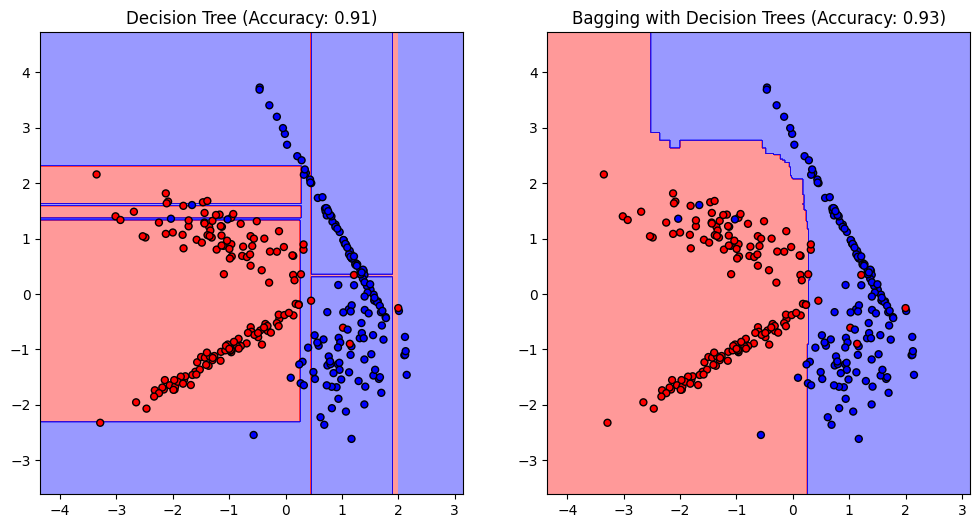

In [ ]:
# 產生Python code:  比較決策樹和和基於決策樹的集成學習 (使用bagging)，繪製個別的決策邊界，同時計算分類準確率
# modified by Yulandy Chiu 2024.09
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 創建一個二分類數據集
X, y = make_classification(n_samples=300, n_classes=2, n_features=2, n_informative=2, n_redundant=0, random_state=21, n_clusters_per_class=2)
## make_classification 參數說明
# n_informative：信息特徵，對分類問題有實質性貢獻的特徵
# n_redundant：冗餘特徵，信息特徵的線性組合生成
# n_repeated：重複特徵，信息特徵或冗餘特徵中複製出來
# n_features>=n_informative+n_redundant+n_repeated (剩餘的特徵隨機生成、與分類無關)


# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 定義繪製決策邊界的函數
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
    ax.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=25, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
    ax.set_title(title)

# 創建一個單一決策樹分類器
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
# 計算準確率
y_pred_tree = tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)



# 創建一個基於Bagging的集成分類器
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),max_samples=0.2,n_estimators=50, random_state=42)
## BaggingClassifier 參數說明
# Scikit-Learn 將predictor視為一種estimator
# 使用較少的樣本增加基模型的差異性(提高多樣性) max_samples=0.2 (使用20%的樣本)
# 因為bagging使用sample with replacement，即便max_samples=1，每個estimator還是會有差異
bagging.fit(X_train, y_train)
# 計算準確率
y_pred_bagging = bagging.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)




# 創建畫布
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 繪製單一決策樹的決策邊界
plot_decision_boundary(tree, X, y, ax1, f"Decision Tree (Accuracy: {accuracy_tree:.2f})")

# 繪製Bagging集成模型的決策邊界
plot_decision_boundary(bagging, X, y, ax2, f"Bagging with Decision Trees (Accuracy: {accuracy_bagging:.2f})")

plt.show()





Bagginbg vs Pasting準確率比較

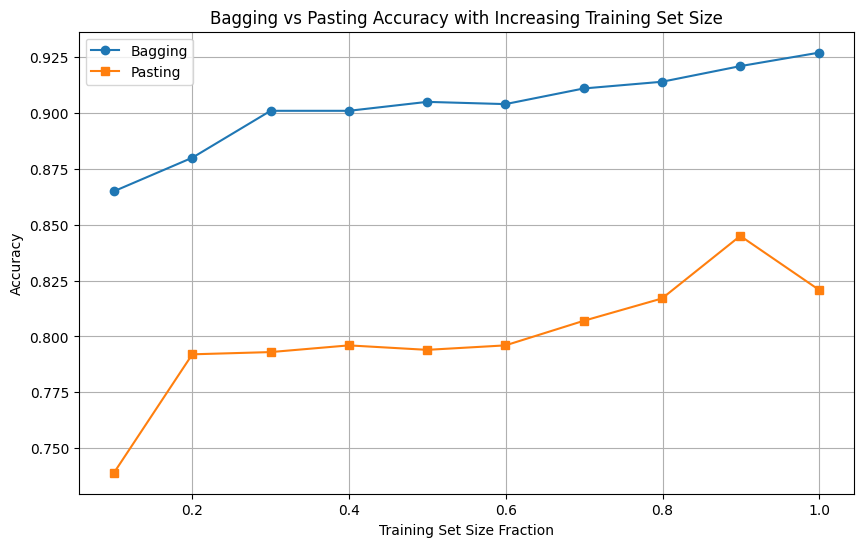

In [ ]:
# 產生Python code，逐步增大訓練集大小，比較bagging和pasting效能
# modified by Yulandy Chiu 2024.10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成合成數據集
X, y = make_classification(n_samples=5000, n_features=20, n_informative=15, random_state=42)

# 劃分數據集
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 設定訓練集大小比例
training_sizes = np.linspace(0.1, 0.999, 10)

# 儲存Bagging和Pasting的準確度
bagging_accuracies = []
pasting_accuracies = []

# 初始化分類器
base_clf = DecisionTreeClassifier(random_state=42)

# Bagging和Pasting
for frac in training_sizes:
    # 根據當前訓練集大小的比例獲取子集
    X_train, _, y_train, _ = train_test_split(X_train_full, y_train_full, train_size=frac, random_state=42)

    # Bagging
    bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=100, random_state=42, bootstrap=True)
    bagging_clf.fit(X_train, y_train)
    y_pred_bagging = bagging_clf.predict(X_test)
    bagging_acc = accuracy_score(y_test, y_pred_bagging)
    bagging_accuracies.append(bagging_acc)

    # Pasting
    pasting_clf = BaggingClassifier(estimator=base_clf, n_estimators=100, random_state=42, bootstrap=False)
    pasting_clf.fit(X_train, y_train)
    y_pred_pasting = pasting_clf.predict(X_test)
    pasting_acc = accuracy_score(y_test, y_pred_pasting)
    pasting_accuracies.append(pasting_acc)

# 繪製結果
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, bagging_accuracies, label='Bagging', marker='o')
plt.plot(training_sizes, pasting_accuracies, label='Pasting', marker='s')
plt.xlabel('Training Set Size Fraction')
plt.ylabel('Accuracy')
plt.title('Bagging vs Pasting Accuracy with Increasing Training Set Size')
plt.legend()
plt.grid(True)
plt.show()
